In [24]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.datasets import load_iris # type: ignore

In [2]:
from scipy.integrate import trapz  # type: ignore

In [3]:
def load_dataset():
    iris= load_iris()
    x= iris.data
    y= iris.target
    return x , y

In [4]:
def predict_randomly(x_sizes, num_classes=3, seed=42):
    np.random.seed(seed= seed)
    return np.random.randint(num_classes, size= x_sizes)

In [5]:
def compute_confuse_matrix(y_true, y_predict):
    num_classes= len(np.unique(y_true))
    confusion_matrix= np.zeros((num_classes, num_classes))
    for true_label, pred_label in zip(y_true, y_predict):
        confusion_matrix[true_label][pred_label] += 1
    return confusion_matrix

In [6]:
def compute_precision(confusion_matrix):
    tp = np.diag(confusion_matrix)
    fp = np.sum(confusion_matrix, axis=0) - tp
    presicion = np.mean(tp/(tp+fp))
    return(presicion)

In [7]:
def compute_recall(confusion_matrix):
    tp= np.diag(confusion_matrix)
    fn= np.sum(confusion_matrix, axis=1) - tp
    recall= np.mean(tp/(tp+fn))
    return(recall)

In [8]:
def compute_F1score(presicion, recall):
    return (2*(presicion * recall))/(presicion + recall)

In [9]:
x,y = load_dataset()
x,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [10]:
y_predict= predict_randomly(x_sizes=x.shape[0])
y, y_predict

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0,
        0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0,
        1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1,
        2, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 2, 0,
        0, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2

In [11]:
confusion_matrix= compute_confuse_matrix(y, y_predict)
confusion_matrix
#en las filas tenemos las predicciones que son reales y en las columnas predicciones q hace nuestro modelo 
#Diagonal los verdaderos positivos y el resto falsos negativos

array([[15., 15., 20.],
       [18., 21., 11.],
       [15., 10., 25.]])

In [12]:
presicion = compute_precision(confusion_matrix)
presicion

0.40515010351966874

In [13]:
recall = compute_recall(confusion_matrix)
recall

0.4066666666666667

In [14]:
F1score= compute_F1score(presicion, recall)
F1score

0.40590696853966496

In [15]:
#establecer la semilla aleatoria
np.random.seed(0)

In [16]:
#generar etiquetas de clase
y= np.random.randint(0, 2, 1000)

In [17]:
#Generar puntuacion de prediccion
y_score_random = np.random.rand(len(y))

In [19]:
#Ordenar puntuaciones y las verdaderas etiqutas en orden desendentes 
sord_puntuaciones= np.argsort(y_score_random)[::-1]
y_sort = y[sord_puntuaciones]

In [20]:
#Calcular falsos positivos y verdaderos positivos acumulados
tp_cumsun = np.cumsum(y_sort)
fp_cumsum = np.cumsum(1-y_sort)

In [21]:
#calcular TPR y FPR
TPR = tp_cumsun/ tp_cumsun[-1]
FPR = fp_cumsum/ fp_cumsum[-1]

In [23]:
#Calcular el AUC
AUC = trapz(TPR, FPR)
AUC

C:\Users\josel\AppData\Local\Temp\ipykernel_2788\1632476192.py:2: DeprecationWarning: 'scipy.integrate.trapz' is deprecated in favour of 'scipy.integrate.trapezoid' and will be removed in SciPy 1.14.0
  AUC = trapz(TPR, FPR)


0.48134280593958023

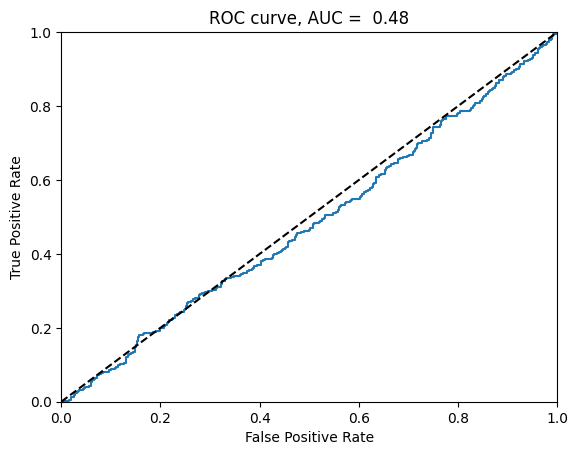

In [26]:
#Plot de ROC y AUC
plt.plot(FPR, TPR)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve, AUC = {: .2f}'.format(AUC))
plt.show()